# Анализ поведения пользователей  в стартапе по продаже продуктов питания

**Цель проекта**
Проанализировать поведение покупателей в мобильном приложении на основании логов пользователей и результатов А/А/В - эксперимента (изменение шрифта во всем приложении).

 
**Ход исследования**

Исследование пройдёт в 6 этапов:

1. Изучение входных данных
2. Предобработка
3. Исследовательский анализ данных
    - Количество событий 
    - Количество пользователей
    - Среднее количество событий на одного пользователя
    - Определение временного промежутка анализа
    - Определение потерь данных при установке временного промежутка анализа
    - Количество пользователей в каждой группе тестирования
4. Изучение воронки событий
    - Анализ всех событий
    - Количество пользователей совершивших событие
    - Определение последовательности событий в воронке
    - Расчет воронки событий. Определение шага с наибольшими потерями и доли пользователей дошедших до оплаты 
5. Изучение результатов эксперимента
    - Количество пользователей в каждой экспериментальной группе
    - Проведение А/А - тестирования
    - Проведение А/Б - тестирования
6. Общий вывод



**Данные**

Каждая запись в логе — это действие пользователя, или событие.
* логи пользователей мобильного приложения (файл `logs_exp.csv`)

`EventName` — название события;   
`DeviceIDHash` — уникальный идентификатор пользователя;    
`EventTimestamp` — время события;     
`ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.   


<h1>Навигация<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Обзор данных</strong></a></span><ul class="toc-item"><li><span><a href="#Функции" data-toc-modified-id="Функции-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Функции</a></span><ul class="toc-item"><li><span><a href="#z-test" data-toc-modified-id="z-test-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>z-test</a></span></li><li><span><a href="#другие-функции" data-toc-modified-id="другие-функции-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>другие функции</a></span></li></ul></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Предобработка</strong></a></span><ul class="toc-item"><li><span><a href="#Наименования-столбцов-и-новые-данные" data-toc-modified-id="Наименования-столбцов-и-новые-данные-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Наименования столбцов и новые данные</a></span></li><li><span><a href="#Проверка-данных-на-соответствие-нормам-А/B-теста" data-toc-modified-id="Проверка-данных-на-соответствие-нормам-А/B-теста-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка данных на соответствие нормам А/B теста</a></span></li><li><span><a href="#Именование-событий-(event)" data-toc-modified-id="Именование-событий-(event)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Именование событий (event)</a></span></li><li><span><a href="#Именование-групп" data-toc-modified-id="Именование-групп-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Именование групп</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Исследовательский анализ данных</strong></a></span><ul class="toc-item"><li><span><a href="#Количество-событий" data-toc-modified-id="Количество-событий-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Количество событий</a></span></li><li><span><a href="#Количество-пользователей" data-toc-modified-id="Количество-пользователей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Количество пользователей</a></span></li><li><span><a href="#Среднее-количество-событий-на-одного-пользователя" data-toc-modified-id="Среднее-количество-событий-на-одного-пользователя-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Среднее количество событий на одного пользователя</a></span></li><li><span><a href="#Определение-временного-промежутка-анализа" data-toc-modified-id="Определение-временного-промежутка-анализа-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Определение временного промежутка анализа</a></span></li><li><span><a href="#Определение-потерь-данных-при-установке-временного-промежутка-анализа" data-toc-modified-id="Определение-потерь-данных-при-установке-временного-промежутка-анализа-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Определение потерь данных при установке временного промежутка анализа</a></span></li><li><span><a href="#Количество-пользователей-в-каждой-группе-тестирования" data-toc-modified-id="Количество-пользователей-в-каждой-группе-тестирования-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Количество пользователей в каждой группе тестирования</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Изучение-воронки-событий" data-toc-modified-id="Изучение-воронки-событий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Изучение воронки событий</a></span><ul class="toc-item"><li><span><a href="#Анализ-всех-событий-и-их-частоты" data-toc-modified-id="Анализ-всех-событий-и-их-частоты-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ всех событий и их частоты</a></span></li><li><span><a href="#Количество-пользователей-совершивших-событие" data-toc-modified-id="Количество-пользователей-совершивших-событие-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Количество пользователей совершивших событие</a></span></li><li><span><a href="#Определение-последовательности-событий" data-toc-modified-id="Определение-последовательности-событий-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Определение последовательности событий</a></span></li><li><span><a href="#Расчет-воронки-событий.-Определение-шага-с-наибольшими-потерями-и-доли-пользователей-дошедших-до-оплаты" data-toc-modified-id="Расчет-воронки-событий.-Определение-шага-с-наибольшими-потерями-и-доли-пользователей-дошедших-до-оплаты-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Расчет воронки событий. Определение шага с наибольшими потерями и доли пользователей дошедших до оплаты</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Изучение-результатов-эксперимента" data-toc-modified-id="Изучение-результатов-эксперимента-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Изучение результатов эксперимента</a></span><ul class="toc-item"><li><span><a href="#Количество-пользователей-в-каждой-экспериментальной-группе" data-toc-modified-id="Количество-пользователей-в-каждой-экспериментальной-группе-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Количество пользователей в каждой экспериментальной группе</a></span></li><li><span><a href="#Подготовка-таблицы-событие-пользователи-для-оценки-результатов-экспериментов" data-toc-modified-id="Подготовка-таблицы-событие-пользователи-для-оценки-результатов-экспериментов-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Подготовка таблицы событие-пользователи для оценки результатов экспериментов</a></span></li><li><span><a href="#А/А-тест.-Проверка-разницы-между-выборками-246-и-247" data-toc-modified-id="А/А-тест.-Проверка-разницы-между-выборками-246-и-247-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>А/А тест. Проверка разницы между выборками 246 и 247</a></span><ul class="toc-item"><li><span><a href="#Проверка-стат.разницы-для-самого-популярного-события-между-А1-и-А2" data-toc-modified-id="Проверка-стат.разницы-для-самого-популярного-события-между-А1-и-А2-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Проверка стат.разницы для самого популярного события между А1 и А2</a></span></li><li><span><a href="#Для-остальных-событий" data-toc-modified-id="Для-остальных-событий-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Для остальных событий</a></span></li><li><span><a href="#Вывод-о-корректности-разбиения-на-группы" data-toc-modified-id="Вывод-о-корректности-разбиения-на-группы-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span><strong>Вывод о корректности разбиения на группы</strong></a></span></li></ul></li><li><span><a href="#А/А/В-тест." data-toc-modified-id="А/А/В-тест.-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>А/А/В тест.</a></span><ul class="toc-item"><li><span><a href="#А1/В" data-toc-modified-id="А1/В-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>А1/В</a></span></li><li><span><a href="#А2/В" data-toc-modified-id="А2/В-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>А2/В</a></span></li><li><span><a href="#А1+А2/В" data-toc-modified-id="А1+А2/В-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>А1+А2/В</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.4.4"><span class="toc-item-num">5.4.4&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Корректировка-для-множественных-тестов" data-toc-modified-id="Корректировка-для-множественных-тестов-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Корректировка для множественных тестов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## **Обзор данных**



Загрузим необходимые библиотеки

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import math as mth
from pandas.plotting import register_matplotlib_converters

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "png"


color = [
    "rgb(0, 147, 146)",
    "rgb(57, 177, 133)",
    "rgb(156, 203, 134)",
    "rgb(233, 226, 156)",
    "rgb(238, 180, 121)",
    "rgb(232, 132, 113)",
    "rgb(207, 89, 126)",
]

pio.templates["myname"] = go.layout.Template(layout_colorway=color)
pio.templates.default = "simple_white+myname"


# конвертеры, которые позволяют использовать типы pandas в matplotlib
register_matplotlib_converters()

# игнорируем предупреждения
import warnings
warnings.filterwarnings(action="ignore")

# отображение текста/таблиц с markdown
from IPython.display import Markdown, display, display_html

# снимаем ограничение на количество столбцов и ширину
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = "{:,.2f}".format

# задаем размер графика
sns.set(rc={"figure.figsize": (12, 6)})

Прочитаем данные и сохраним их в рабочие таблицы

In [2]:
# чтение файлов с данными и сохранение в df
try:
    logs = pd.read_csv("https://code.s3.yandex.net/datasets/logs_exp.csv", sep="\t")
except:
    logs = pd.read_csv("logs_exp.csv", sep="\t")

# дадим датафрейму имя (понадобится в функции для предобработки данных)
logs.name = "logs"

In [3]:
logs.name

'logs'

### Функции

Вынесли функции, использующиеся как в предобработке данных, так и далее в проекте

- `label()` — для подписей столбчатых графиков,
- `inf_df()` — информация о датафрейме,
- `column_info()` — информация о уникальных значениях в колонках, а для числовых - описательная статистика и диаграммы размаха,
- `st_create()` — функция для формирования выборок для проведения z-test из общего подготовленного датафрейма
- `z_test()` - функция для проведения z-теста

#### z-test

In [4]:
# функция для проведения z-теста
# аргументы
# - датафрейм (если у нас будет несколько таблиц и просто чтобы не привязываться к названию в коде функции),
# - наименования сравниваемых групп - группа 1, группа 2,
# - alpha (не обязательное, по умолчанию - 0.05)
# - событие (необязательное, по умолчанию - по всем из датафрейма)

def z_test(df, group_1, group_2, alpha = 0.05, event=0):
    
    table = pd.DataFrame()
    display(Markdown(f'**z-test между группами {group_1} и {group_2}, значение alpha - {alpha}**'))
    
    # если событие не указано, берем все строки из датафрейма кроме последней (итоговой)
    if event == 0 :
        event=list(df.index[0:-1])
    
    # для каждого элемента из списка событий
    for i in list(event):
        
        # вызываем функцию которая формирует необходимые выборки из сводной таблицы для определения долей
        s_1, s_2, t_1, t_2 = st_create(df, i, group_1, group_2)

        # определение долей (успеха) по группам
        p1 = s_1/t_1
        p2 = s_2/t_2
        p_combined = (s_1 + s_2) / (t_1 + t_2)        
        difference = p1 - p2
        
        # считаем статистику в стандартных отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/t_1 + 1/t_2))
        
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1) 
        
        # считаем p_value
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        
        data = {'group_1':group_1,'group_2':group_2,'event':i,'p_value':p_value}
        table = table.append(data, ignore_index=True)
        
        # выводим результат
        display(Markdown(f'Для события **{i}** p-значение: **{p_value.round(5)}**'))
        if (p_value < alpha):
            print("   Отвергаем нулевую гипотезу так как между долями есть значимая разница")
        else:
            print("   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
    return table

In [5]:
# функция для формирования выборок для проведения z-test из общего подготовленного датафрейма
def st_create(df, event, group_1, group_2):
    
        # значения выборок по событию
        success_1 = df.loc[event, group_1]
        success_2 = df.loc[event, group_2]
    
        # значения выборок всего
        trial_1 = df.loc[df.index[-1],group_1] 
        trial_2 = df.loc[df.index[-1], group_2]
        
        return success_1, success_2, trial_1, trial_2

#### другие функции

In [6]:
# функция подписи значений на столбчатой диаграмме
# аргументы  
# axs - оси/датафрейм, 
# orient - ориентация (вертикальная/горизонатальная), чтобы определить где располагать подписи
# total - сумма, если указано, то определем долю значения относительно нее и выводим % 
# space - отступы для регулировки расположения 

def label(axs, orient="v", total=0, space=1):
    def _single(ax):
        if orient == "v":
            if total == 0:
                for p in ax.patches:
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height()
                    value = "{:.2f}".format(p.get_height())
                    ax.text(_x, _y, value, ha="center")
            elif total > 0:
                for p in ax.patches:
                    percentage = "{:.1f}%".format(100 * p.get_height() / total)
                    x = p.get_x() + p.get_width() / 2
                    y = p.get_y() + p.get_height()
                    ax.annotate(percentage, (x, y), ha="center")

        elif orient == "h":
            if total == 0:
                for p in ax.patches:
                    _x = p.get_x() + p.get_width() + space
                    _y = p.get_y() + p.get_height() - (p.get_height() * 0.5)
                    value = "{:.0f}".format(p.get_width())
                    ax.text(_x, _y, value, ha="left")
            elif total > 0:
                for p in ax.patches:
                    percentage = "{:.1f}%".format(100 * p.get_width() / total)
                    x = p.get_x() + p.get_width() + 0.2
                    y = p.get_y() + 0.5
                    ax.annotate(percentage, (x, y), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)


In [7]:
# функция для просмотра информации о датафрейме
def inf_df(df):

    # общая информация о датафрейме
    display(Markdown(f"**Общая информация о датафрейме - {df.name}**"))
    df.info()
    display(Markdown(f"**Первые 10 строк {df.name}**"), df.head(10))

    # проверим возможное количество дубликатов
    if df.duplicated().sum() > 0:
        display(Markdown(f"**Количество явных дубликатов:** {df.duplicated().sum()}"))
        display(Markdown(f"% явных дубликатов: **{round(df.duplicated().sum()/len(df)*100,2)} %**"))
    else:
        display(Markdown(f"**Явных дубликатов в {df.name} нет**"))

    # оценка пропусков
    # соберем сумму пропусков по каждому столбцу
    nulls = df.isnull().sum().sort_values(ascending=False).round(1).reset_index()
    # именуем колонки
    nulls.columns = ["Параметр", "Количество_пропусков"]
    # уберем строки, в которых пропуски отсутствуют
    nulls_bar = nulls.query("Количество_пропусков > 0")
    # сохраним общее количество строк для подсчета % пропусков
    total = len(df)

    # нарисуем диаграмму
    if nulls_bar.empty == False:
        f, ax = plt.subplots(figsize=(8, 3))
        pl = sns.barplot(x="Количество_пропусков", y="Параметр", data=nulls_bar)
        plt.title("Доля содержания пропусков по каждому параметру")
        # подпишем значения % функцией
        label(pl, "h", total)
        plt.show()
        # выведем таблицу с суммой пропусков по каждому столбцу
        display(df.isna().sum().to_frame())
    else:
        display(Markdown(f"**Пропусков в {df.name} нет**"))
 

In [8]:
# просмотр информации по столбцам
def column_info(df):
    np.object = object
    for i in df.columns:
        if df[i].dtype == np.object:
            display(
                Markdown(f"**Список уникальных значений столбца {i}**"), df[i].unique()
            )
    # построим диаграмму размаха для всех числовых столбцов
    display(Markdown(f"**Описание числовых столбцов {df.name}**"), df.describe())
    df.plot(kind="box", subplots=True, layout=(2, 3), figsize=(12, 10))

### Знакомство с данными

Изучим данные. Проверим есть ли в данных пропуски и дубликаты. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. 
Оценим датафрейм - logs.
С помощью функции inf_df выведем подготовленную оценку.

In [9]:
inf_df(logs)

**Общая информация о датафрейме - logs**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


**Первые 10 строк logs**

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


**Количество явных дубликатов:** 413

% явных дубликатов: **0.17 %**

**Пропусков в logs нет**

С помощью функции column_info выведем информацию о содержании столбцов

**Список уникальных значений столбца EventName**

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

**Описание числовых столбцов logs**

,DeviceIDHash,EventTimestamp,ExpId
count,"244,126.00","244,126.00","244,126.00"
mean,"4,627,568,124,591,259,648.00","1,564,913,915.84",247.02
std,"2,642,424,998,963,961,856.00","177,134.32",0.82
min,"6,888,746,892,508,752.00","1,564,029,816.00",246.00
25%,"2,372,212,476,992,240,640.00","1,564,756,580.25",246.00
50%,"4,623,191,541,214,045,184.00","1,564,919,395.00",247.00
75%,"6,932,517,045,703,054,336.00","1,565,074,511.00",248.00
max,"9,222,603,179,720,523,776.00","1,565,212,517.00",248.00


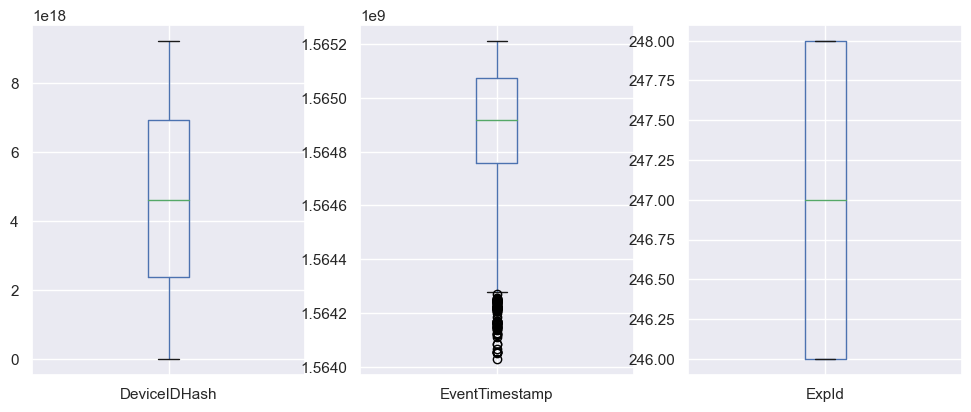

In [10]:
column_info(logs)

### **Вывод** 
- Пропусков значений нет
- Дубликатов строк - 0.17%, их можно удалить 

**Содержание** 
- **EventName** - 5 событий 'MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear', 'OffersScreenAppear', 'Tutorial', неявных дубликатов нет, для удобства чтения графиков можно перевести названия на русский 
- **ExpId** - 3 группы под номерами 246, 247, 248 - что соответствует входным данным, для удобства чтения графиков и таблиц можно ввести дополнительно наименования А1 и А2 для контрольных 246 и 247 группы и В для 248 группы
- **EventTimestamp** - информация о дате и времени событии, для удобства на ее основании нужно добавить отдельно дату-время в формате date и информацию о дате без времени 

**Стиль наименований**
- названия столбцов необходимо перевести в нижний регистр 

**Типы данных** 
- соответствуют содержанию

## **Предобработка**
По выводам, сделанным в процессе знакомства с данными, произведем их предобработку.

### Наименования столбцов и новые данные


Удалим дубликаты 

Изменим названия столбцов. 

Добавим столбец даты и времени, а также отдельный столбец дат;

In [11]:
# удалим дубликаты
logs = logs.drop_duplicates().reset_index(drop=True)
print('Кол-во оставшихся дубликатов =', logs.duplicated().sum())

Кол-во оставшихся дубликатов = 0


In [12]:
# изменим наименования столбцов orders
logs.columns = ["event", "user_id", "timestamp", "group_id"]

# определим дату и время события
logs["event_time"] = pd.to_datetime(
    logs["timestamp"], errors="ignore", unit="s"
)  

# определим отдельно дату события
logs["date"] = logs["event_time"].dt.floor("d")  

# оценим изменения
logs.head()

,event,user_id,timestamp,group_id,event_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


### Проверка данных на соответствие нормам А/B теста

На всякий случай проверим нет ли ошибки в данных и пересечения пользователей в группах, когда они попали одновременно в несколько групп тестирования

In [13]:
# соберем таблицу с группировкой по user_id и посчитаем количество групп пользователя
user_dub = logs.groupby("user_id")["group_id"].nunique().reset_index()

# выведем количество пользователей, у которых число групп больше 1
display(
    Markdown(
        f'Пользователей, попавших в несколько групп одновременно - \
                **{user_dub[user_dub["group_id"] != 1]["user_id"].count()}**'
    )
)

Пользователей, попавших в несколько групп одновременно -                 **0**

### Именование событий (event)
Именуем события для удобства чтения графиков и таблиц

In [14]:
# создадим словарь
dict1 = {
    "MainScreenAppear": "Главный экран",
    "PaymentScreenSuccessful": "Экран оплаты",
    "CartScreenAppear": "Экран заказа",
    "OffersScreenAppear": "Экран офера",
    "Tutorial": "Обучение",
}

# заполним новый столбец по словарю
logs["event_name"] = logs["event"].map(dict1)

### Именование групп

Именуем группы для удобства чтения графиков и таблиц

In [15]:
# создадим словарь
dict2 = {
    246: "A1",
    247: "A2",
    248: "B",
}

# заполним новый столбец по словарю
logs["group_name"] = logs["group_id"].map(dict2)

### **Вывод**
Оценим изменения

In [16]:
# оценим изменения
logs.info()
logs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   timestamp   243713 non-null  int64         
 3   group_id    243713 non-null  int64         
 4   event_time  243713 non-null  datetime64[ns]
 5   date        243713 non-null  datetime64[ns]
 6   event_name  243713 non-null  object        
 7   group_name  243713 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 14.9+ MB


,event,user_id,timestamp,group_id,event_time,date,event_name,group_name
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,Главный экран,A1
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,Главный экран,A1
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,Экран оплаты,B
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,Экран заказа,B
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,Экран оплаты,B


- Пропусков значений нет
- Дубликатов строк нет (удалено 0.17% от изначальной величины датафрейма)

**Стиль наименований**
- столбцы переименованы в удобном виде 

**Содержание** 
- **user_id** - информация об идентификаторе пользователя
- **event** - 5 событий 'MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear', 'OffersScreenAppear', 'Tutorial', неявных дубликатов нет, 
- **event_name** - для удобства чтения введен столбец с наименованием событий на языке отчета - 5 событий 'Главный экран', 'Экран оплаты', 'Экран заказа', 'Экран офера', 'Обучение'
- **group_id** - 3 группы под номерами 246, 247, 248 - что соответствует входным данным, 
- **group_name** - для удобства чтения графиков и таблиц введены дополнительно наименования А1 и А2 для контрольных 246 и 247 группы и В для 248 группы
- **timestamp** - информация о дате и времени событии, 
- **event_time** - для удобства обработки информации добавлен столбец с датой и временем события в формате datetime
- **date** - для удобства обработки информации добавлен столбец с датой события без ууказания времени 


**Типы данных** 
- соответствуют содержанию

## **Исследовательский анализ данных**

На данном этапе необходимо изучить и проверить следующие данные: 

- Сколько всего событий в логе
- Сколько всего пользователей в логе
- Сколько в среднем событий приходится на пользователя
- Данными за какой период мы располагаем. Найти максимальную и минимальную дату. Построить гистограмму по дате и времени. Определить можно ли быть уверенным, что у нас одинаково полные данные за весь период. Определить, с какого момента данные полные и отбросить более старые. Определить данными за какой период времени мы располагаем на самом деле
- Много ли событий и пользователей мы потеряли, отбросив старые данные
- Проверить, что у нас есть пользователи из всех трёх экспериментальных групп.

###  Количество событий

In [17]:
display(Markdown(f"**Всего событий  -** {logs['event_name'].count()}"))
display(Markdown(f"**Уникальные события  -** {logs['event_name'].nunique()} это  {logs['event_name'].unique()}"))

**Всего событий  -** 243713

**Уникальные события  -** 5 это  ['Главный экран' 'Экран оплаты' 'Экран заказа' 'Экран офера' 'Обучение']

###  Количество пользователей

In [18]:
display(Markdown(f"**Количество пользователей -** {logs['user_id'].nunique()}"))

**Количество пользователей -** 7551

###  Среднее количество событий на одного пользователя


In [19]:
#соберем сводную таблицу по user_id, подсчитав количество событий для обозначенной группировки 
events = logs.pivot_table(index='user_id', values='event_name', aggfunc='count')
events.describe(percentiles=[0.95, 0.99])

,event_name
count,"7,551.00"
mean,32.28
std,65.15
min,1.00
50%,20.00
95%,89.00
99%,200.50
max,"2,307.00"


**В среднем - 32 события на пользователя**, 

медиана - 20 и даже по описательной статистике мы видим выбросы.
Посмотрим на гистограмму распределения количества событий на пользователя

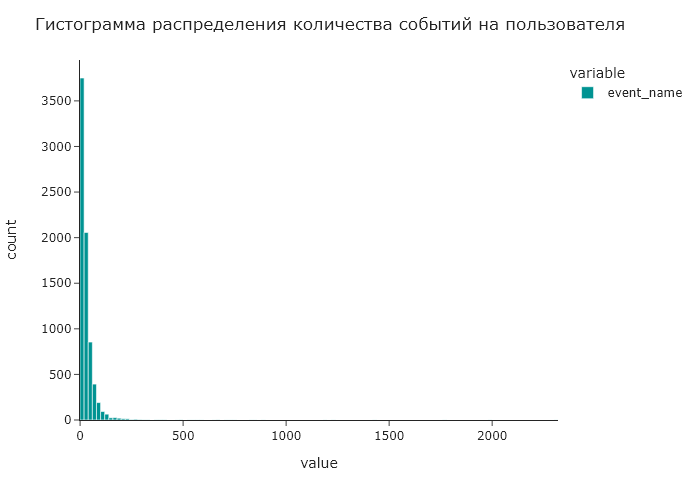

In [20]:
fig = px.histogram(events['event_name'], nbins=200)
fig.update_layout(title_text="Гистограмма распределения количества событий на пользователя")

fig.update_traces( textsrc="outside")
fig.show()

Выбросы очевидны, посмотрим на распределение событий по пользователям, участвовавшим не более чем в 88 событиях (95% персентиль по описательной статистике).

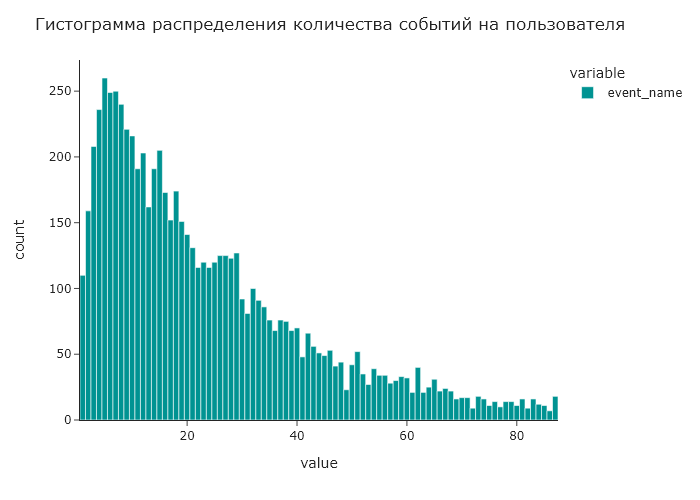

In [21]:
fig = px.histogram(events.query('event_name < 88')['event_name'], nbins=100)
fig.update_layout(title_text="Гистограмма распределения количества событий на пользователя")

fig.update_traces( textsrc="outside")
fig.show()

Здесь нас уже встречает нормальное распределение. Так как мы не удаляли выбросы по обозначенному параметру, в оценке среднего количества событий на пользователя **лучше ориентироваться на медианное значение - 20 событий на пользователя**

###  Определение временного промежутка анализа

In [22]:
display(Markdown(f"**Первый день наличия данных в логе -** {logs['date'].min()}"))
display(Markdown(f"**Последний день наличия данных в логе -** {logs['date'].max()}"))

**Первый день наличия данных в логе -** 2019-07-25 00:00:00

**Последний день наличия данных в логе -** 2019-08-07 00:00:00

Посмотрим на распределение данных по дням

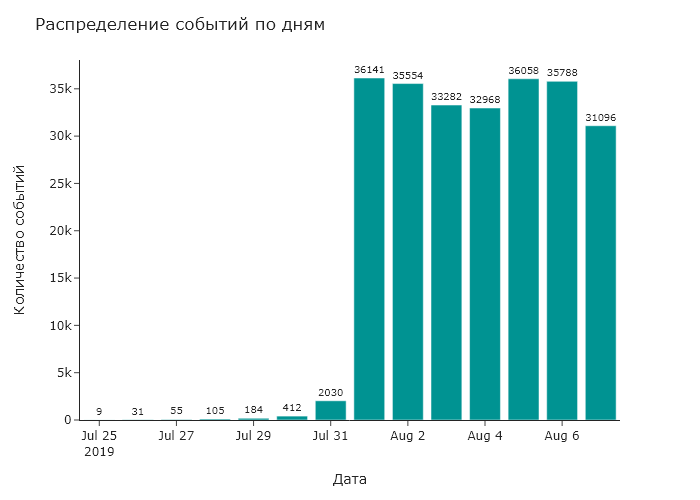

,Дата,Количество событий
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184
5,2019-07-30,412
6,2019-07-31,2030
7,2019-08-01,36141
8,2019-08-02,35554
9,2019-08-03,33282


In [23]:
#соберем таблицу, сгруппированную по дате и количеству событий в нее
event_by_day = logs.groupby('date').agg(event_count = ('event', 'count')).reset_index()
event_by_day.columns=['Дата','Количество событий']

# по собранным данным отрисуем распределение
fig = px.bar(event_by_day,
    x='Дата',
    y='Количество событий',
    text='Количество событий',
)
fig.update_layout(
    title_text='Распределение событий по дням',
)

fig.update_traces(
    textfont_size=10, textangle=0, textposition='outside', cliponaxis=False
)
fig.show()

# и посмотрим на таблицу
event_by_day

Посмотрим на более подробное распределение данных - по часам

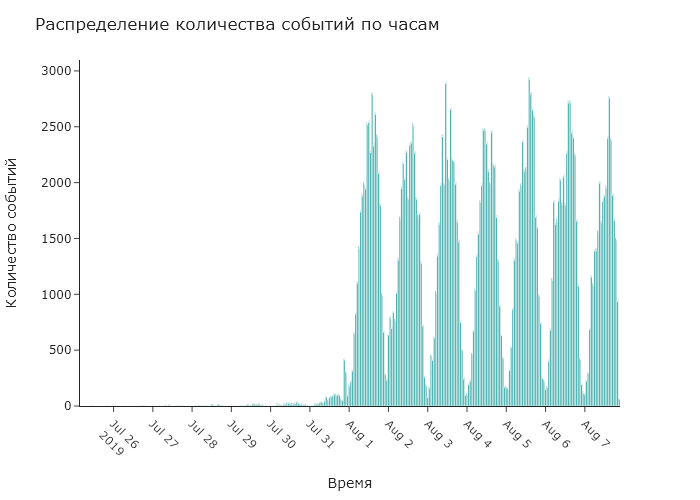

In [24]:
# создадим столбец с часом события
logs['event_hour']=logs['event_time'].dt.floor('h')  

# сгруппируем по нему количество событий 
event_by_hour = logs.groupby('event_hour')['event_time'].count().reset_index()
event_by_hour.columns=['Время','Количество событий']

# отрисуем график 
fig = px.bar(event_by_hour,
    x='Время',
    y='Количество событий',
    text='Количество событий',
)
fig.update_layout(
    title_text='Распределение количества событий по часам',
)

fig.update_xaxes(tickangle=45,
                 tickmode = 'linear',
                 dtick =  86400000.0,
                )
fig.show()

Уже на первом графике видно, что данные за июль - неполные. Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». На графике по часам мы четко видим, что за 1 августа данные полноценные и по графику совпадают с активностью в следующие дни, основная активность пользователей - в дневное время по серверу (логам).    
Поэтому, для исследования берем данные с **01-08-2019**.  

In [25]:
# задаем дату для обрезки данных
date_for_clean = pd.to_datetime('2019-08-01', format = '%Y-%m-%d')

# сохраняем отфильтрованные данные
logs_clear = logs[logs['date'] >= date_for_clean]

###  Определение потерь данных при установке временного промежутка анализа

Посчитаем сколько пользователей мы потеряли отфильтровав дни с неполными данными

In [26]:
# данные по изначальному датафрейму
events_old = logs.shape[0]
users_old = logs["user_id"].nunique()

# данные по отфильтрованному датафрейму
events_new = logs_clear.shape[0]
users_new = logs_clear["user_id"].nunique()

display( 
    Markdown(
        f"**Изменение количества событий**:{events_new - events_old} {'({:.1%})'.format((events_old - events_new)/events_old)}"
    )
)
display(
    Markdown(
        f"**Изменение количества пользователей:** {users_new - users_old} {'({:.1%})'.format((users_old - users_new)/users_old)}"
    )
)

**Изменение количества событий**:-2826 (1.2%)

**Изменение количества пользователей:** -17 (0.2%)

Итого, мы потеряли всего 1.2% от количества событий и 0.2% от количества пользователей. Допустимые потери, зафиксируем изменения на данном этапе

In [27]:
logs=logs_clear

###  Количество пользователей в каждой группе тестирования

Проверим, что у нас есть пользователи из всех трёх экспериментальных групп

In [28]:
users_by_group = logs.groupby("group_name")["user_id"].nunique()
users_by_group_table = users_by_group.to_frame().reset_index().rename(
    columns={"group_name": "Группа", "user_id": "Количество пользователей"}
)
users_by_group_table

,Группа,Количество пользователей
0,A1,2484
1,A2,2513
2,B,2537


Все отлично, в каждой экспериментально группе есть пользователи

###  **Вывод**

- Всего событий - 243713 Уникальных событий - 5 это ('Главный экран', 'Экран оплаты', 'Экран заказа','Экран офера','Обучение')
- Всего пользователей в логе - 7551
- В среднем событий  на пользователя - 32, с учетом выбросов лучше ориентироваться на медианное значение - 20 событий на пользователя
- События в логах за период - 2019-07-25 по 2019-08-07. Но полные данные только с 1 августа
- При удалении неполных данных мы потеряли 1.2% событий и 0.2% пользователей
- Убедились что у нас есть пользователи из всех трех групп

## Изучение воронки событий

На данном этапе нам необходимо:
- Посмотреть какие события есть в логах, как часто они встречаются. Отсортировать события по частоте.
- Посчитать, сколько пользователей совершали каждое из этих событий. Отсортировать события по числу пользователей. Посчитать долю пользователей, которые хоть раз совершали событие.
- Предположить, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? 
- По воронке событий посчитать, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). 
- Определить на каком шаге теряем больше всего пользователей?
- Определить какая доля пользователей доходит от первого события до оплаты?

###  Анализ всех событий и их частоты

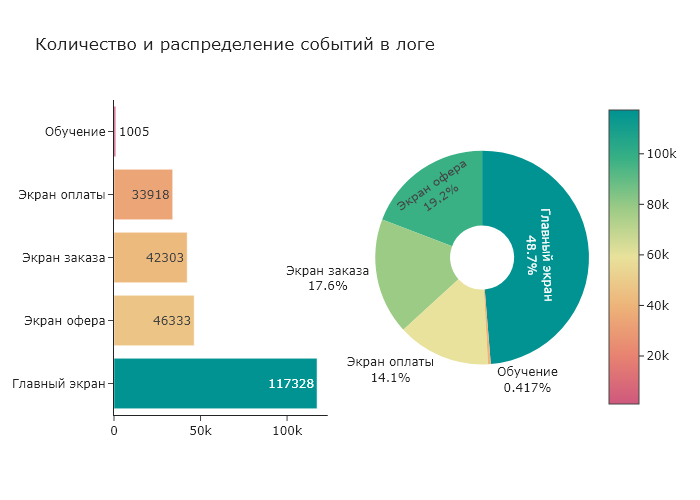

,Событие,Количество
0,Главный экран,117328
4,Экран офера,46333
2,Экран заказа,42303
3,Экран оплаты,33918
1,Обучение,1005


In [29]:
# посчитаем количество записей для каждого события

event_count = (
    logs.groupby("event_name")
    .agg({"event_time": "count"})
    .reset_index()
    .sort_values(by="event_time", ascending=False)
)
event_count.columns = ["Событие", "Количество"]
event_count

# построим две диаграммы - столбчатую и линейную
fig = make_subplots(
    rows=1, cols=2, shared_yaxes=True, specs=[[{"type": "bar"}, {"type": "pie"}]]
)

fig.add_trace(
    go.Pie(
        values=event_count["Количество"],
        labels=event_count["Событие"],
        textinfo="label+percent",
        hole=0.3,
    ),
    row=1,
    col=2,
)
fig.add_trace(
    go.Bar(
        x=event_count["Количество"],
        y=event_count["Событие"],
        marker=dict(color=event_count["Количество"], coloraxis="coloraxis"),
        orientation="h",
        text=event_count["Количество"],
        textposition="auto",
    ),
    row=1,
    col=1,
)
fig.update_layout(
    title_text="Количество и распределение событий в логе",
    coloraxis=dict(colorscale="Temps_r"),
    showlegend=False,
)
fig.show()

display(event_count)

* MainScreenAppear (Главный экран) увидели 117328 раз;    
* OffersScreenAppear (Экран офера) увидели 46333 раза;      
* CartScreenAppear (Экран заказа) увидели 42303 раза;     
* PaymentScreenSuccessful (Экран с подтверждением успешной оплаты) увидели 33918 раз;     
* Tutorial (Обучение) просмотрели 1005 раз.

###  Количество пользователей совершивших событие

Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

In [30]:
# соберем в таблицу с группировкой по событию количество пользователей
event_by_user = (logs.
          groupby('event_name').
          agg({'user_id': 'nunique'}).
          reset_index().
          sort_values(by='user_id', ascending=False))

# добавим расчет доли пользователей хоть раз совершивших это событие
event_by_user['share'] = (event_by_user['user_id'] / logs['user_id'].nunique() * 100)  
event_by_user.columns = ['Событие', 'Количество пользователей', '% пользователей от исходного']

event_by_user

,Событие,Количество пользователей,% пользователей от исходного
0,Главный экран,7419,98.47
4,Экран офера,4593,60.96
2,Экран заказа,3734,49.56
3,Экран оплаты,3539,46.97
1,Обучение,840,11.15


###  Определение последовательности событий 

Мы можем предположить, что все события выстраиваются в цепочку действий, кроме просмотра Обучения (Tutorial). Обучение само по себе дополнительная активность не влияющая на прямую последовательность действий при заказе: 
  *  Главный экран
  *  Экран офера/предложения
  *  Экран заказа
  *  Экран подтверждения успешной оплаты
  
 Здесь стоит отметить, что это только предполагаемая логичная последовательность событий, но, если программно нет ограничений, то она может нарушаться, какие-то из заказов будут совершены и по другой последовательности, например минуя главный экран если внутри приложения есть разные возможности по переходу к экрану заказа.
 Но в рамках исследования ограничимся изучением только прямой последовательности действий. 

### Расчет воронки событий. Определение шага с наибольшими потерями и доли пользователей дошедших до оплаты


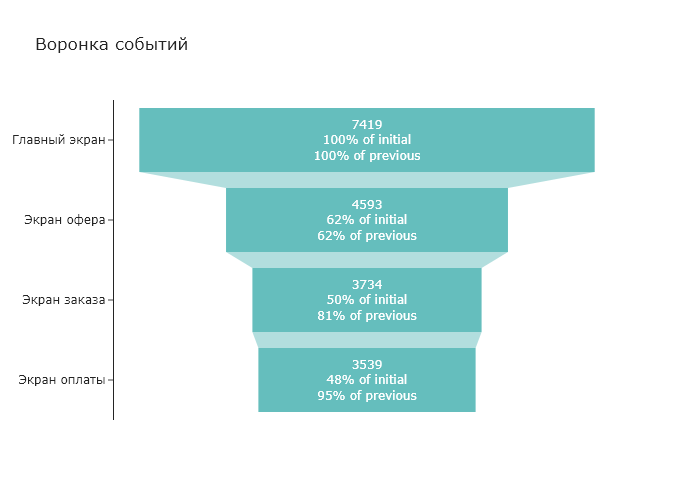

In [31]:
# отфильтруем из изучаемой последовательности событий Обучение
funnel = event_by_user[event_by_user['Событие'] != 'Обучение']


# посмотрим на визуализацию предполагаемой воронки событий
fig = go.Figure(go.Funnel(y = funnel['Событие'],
                          x = funnel['Количество пользователей'],
                          opacity = 0.6,
                          textposition = 'inside',
                          textinfo = 'value + percent previous + percent initial'))
fig.update_layout(title_text='Воронка событий')
fig.show()

Посчитаем сами, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C → D посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, отношение числа пользователей с событием C к количеству пользователей с событием B и т.д.

In [32]:
funnel['% пользователей от предыдущего шага'] = (funnel.iloc[:,1] /  funnel.iloc[:,1].shift(1) * 100).fillna(100)
funnel['Потери'] = (100 - funnel.iloc[:,3]).fillna(0)
funnel

,Событие,Количество пользователей,% пользователей от исходного,% пользователей от предыдущего шага,Потери
0,Главный экран,7419,98.47,100.00,0.00
4,Экран офера,4593,60.96,61.91,38.09
2,Экран заказа,3734,49.56,81.30,18.70
3,Экран оплаты,3539,46.97,94.78,5.22


Очевидно, что на шаге показа Экрана офера/предложения мы теряем больше всего пользователей - 38% от количества на предыдущем шаге, в то же время самые маленькие потери между заказом и оплатой - всего 5%

Всего до оплаты в предположительно прямой последовательности действий доходит 47% пользователей от общего количества, это очень неплохой результат.

### **Вывод**

События по частоте 
 - MainScreenAppear (Главный экран) увидели 117328 раз;    
 - OffersScreenAppear (Экран офера) увидели 46333 раза;      
 - CartScreenAppear (Экран заказа) увидели 42303 раза;     
 - PaymentScreenSuccessful (Экран с подтверждением успешной оплаты) увидели 33918 раз;     
 - Tutorial (Обучение) просмотрели 1005 раз.

Мы  предположили, что все события выстраиваются в цепочку действий, кроме просмотра Обучения (Tutorial). Обучение само по себе дополнительная активность не влияющая на прямую последовательность действий при заказе: 
  *  Главный экран
  *  Экран офера/предложения
  *  Экран заказа
  *  Экран подтверждения успешной оплаты
  
Очевидно, что на шаге показа Экрана офера/предложения мы теряем больше всего пользователей - 38% от количества на предыдущем шаге, в то же время самые маленькие потери между заказом и оплатой - всего 5%

Всего до оплаты в предположительно прямой последовательности действий доходит 47% пользователей от общего количества, это очень неплохой результат.

## Изучение результатов эксперимента

На данном этапе нам необходимо определить:
- Сколько пользователей в каждой экспериментальной группе?
- Проверить, находят ли статистические критерии разницу между выборками 246 и 247 (А1 и А2).
- Выбрать самое популярное событие. Посчитать число пользователей, совершивших это событие в каждой из контрольных групп. Посчитать долю пользователей, совершивших это событие. Проверить, будет ли отличие между группами статистически достоверным. Провести проверку для всех других событий. Сделать вывод о корректности разбиения на группы 
- Аналогично поступить с группой с изменённым шрифтом (248 - B). Сравнить результаты с каждой из контрольных групп в отдельности по каждому событию. Сравнить результаты с объединённой контрольной группой. Сделать выводы из эксперимента?
- Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

### Количество пользователей в каждой экспериментальной группе

Проверим, что пользователи корректно разбиты на группы

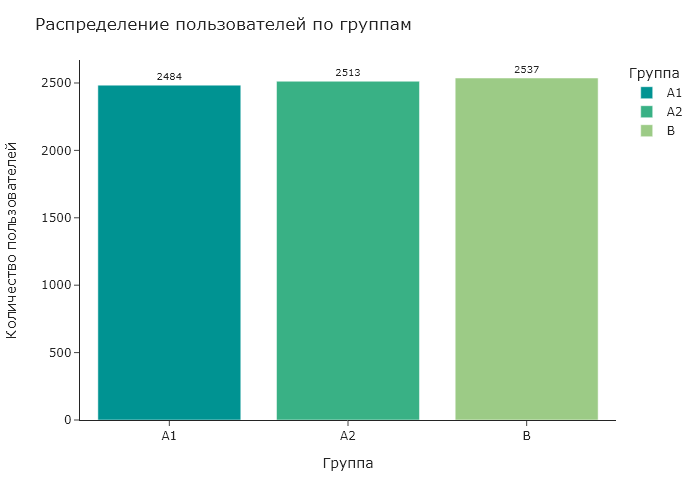

,Группа,Количество пользователей
0,A1,2484
1,A2,2513
2,B,2537


In [33]:
# разбиение пользователей по группам мы проверяли в 3.6 - переменная users_by_group, построим график
fig = px.bar(
    users_by_group_table,
    x='Группа',
    y='Количество пользователей',
    text='Количество пользователей',
    color='Группа',
)
fig.update_layout(
    title_text='Распределение пользователей по группам',
)

fig.update_traces(
    textfont_size=10, textangle=0, textposition='outside', cliponaxis=False
)
fig.show()
users_by_group_table

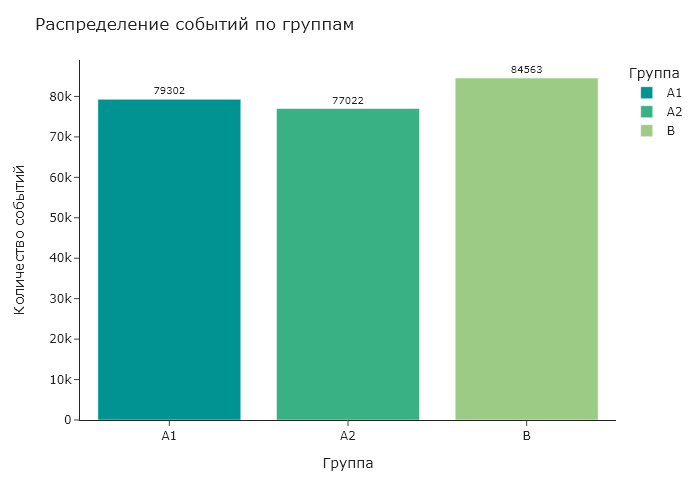

,Группа,Количество событий
0,A1,79302
1,A2,77022
2,B,84563


In [34]:
events_by_group = (
    logs.groupby('group_name')
    .agg({'user_id': 'count'})
    .reset_index()
    .rename(columns={'group_name': 'Группа', 'user_id': 'Количество событий'})
)

fig = px.bar(
    events_by_group,
    x='Группа',
    y='Количество событий',
    text='Количество событий',
    color='Группа',
)
fig.update_layout(
    title_text='Распределение событий по группам',
)

fig.update_traces(
    textfont_size=10, textangle=0, textposition='outside', cliponaxis=False
)
fig.show()


events_by_group

Проверили - пользователи и события есть во всех группах, 

Количество пользователей
- A1	- 2484
- A2	- 2513
- B	- 2537

### Подготовка таблицы событие-пользователи для оценки результатов экспериментов

Подготовим сводную таблицу для дальнейшего использования.

В ней нам нужно собрать количество пользователей в разрезе событий по
- каждой группе (А1, А2, В), 
- сводной группе (А1+А2) 

In [35]:
# дополним users_by_group информацией о сводной группе (А1+А2) 
users_by_group["A1A2"] = users_by_group['A1'] + users_by_group['A2']

# соберем общую таблицу с количеством пользователей в разрезе событий
all_events_test = (logs
    .pivot_table(
        index="event_name", columns="group_name", values="user_id", aggfunc="nunique"
    )
    .sort_values(by="A1", ascending=False)
    .reset_index()
)

# сразу дополним таблицу информацией по сводной группе (А1+А2) и общим количеством пользователей
all_events_test["A1A2"] = all_events_test["A1"] + all_events_test["A2"]

#добавим информации об общем количестве уников в нашу таблицу из users_by_group
all_events_test = (
    all_events_test.append(users_by_group)
    .fillna("Всего уников")
    .reset_index(drop=True)
)

# установим индексом События так как будем с ним обращаться дальше в функции
all_events_test=all_events_test.set_index('event_name')

# оценим результат
all_events_test

group_name,A1,A2,B,A1A2
event_name,,,,
Главный экран,"2,450.00","2,476.00","2,493.00","4,926.00"
Экран офера,"1,542.00","1,520.00","1,531.00","3,062.00"
Экран заказа,"1,266.00","1,238.00","1,230.00","2,504.00"
Экран оплаты,"1,200.00","1,158.00","1,181.00","2,358.00"
Обучение,278.00,283.00,279.00,561.00
Всего уников,"2,484.00","2,513.00","2,537.00","4,997.00"


In [36]:
# уберем Обучение и из проверки гипотез, так как не рассматривали его в воронке
# сделала отдельным шагом, чтобы была возможность поменять решение :)
all_events_test = all_events_test.query('event_name != "Обучение"')

### А/А тест. Проверка разницы между выборками 246 и 247

Критерии успешного A/A-теста:

   * Количество пользователей в различных группах различается не более, чем на 1%;
   * Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
   * Попавший в одну из групп посетитель остаётся в этой группе до конца теста. 


**Количество пользователей в различных группах различается не более, чем на 1%**

Посчитаем не только для А1 и А2, но и сразу для B

In [37]:
# список групп для сравнения численности
group_list = ["A1", "A2", "B"]

# в цикле по списку и users_by_group проведем попарное сравнение
for i in range(len(group_list)):
    for j in range(i + 1, len(group_list)):
        print(f"Отношение количества пользователей группы {users_by_group.index[i]} \
        к группе {users_by_group.index[j]} \
        равно {round(users_by_group[i]/users_by_group[j],2)}"
        )

Отношение количества пользователей группы A1         к группе A2         равно 0.99
Отношение количества пользователей группы A1         к группе B         равно 0.98
Отношение количества пользователей группы A2         к группе B         равно 0.99


Расчеты подтверждают что разница между количеством пользователей в группах А1 и А2 не превышает 1%

**Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же**

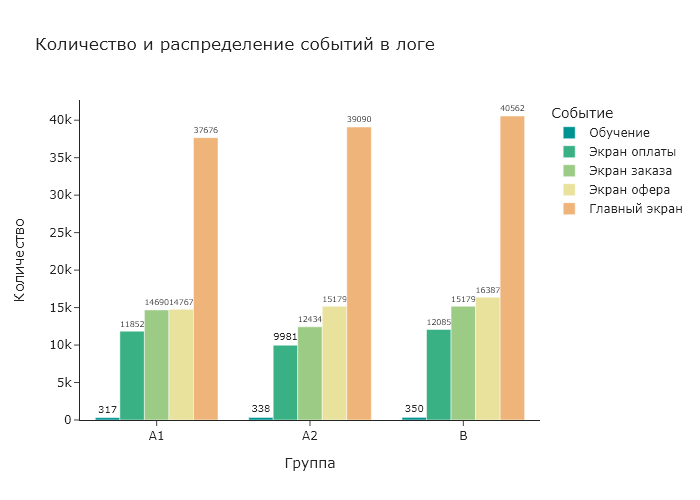

In [38]:
# Подсчёт количества записей для каждого события
event_count = (
    logs.groupby(['event_name', 'group_name'])
    .agg({'event_time': 'count'})
    .reset_index()
    .sort_values(by='event_time', ascending=True)
)
event_count.columns = ['Событие', 'Группа', 'Количество']

fig = px.bar(
    event_count,
    x='Группа',
    y='Количество',
    color='Событие',
    title='Long-Form Input',
    barmode='group',
    text='Количество',
)
fig.update_traces(textfont_size=10, textangle=0, textposition='outside', cliponaxis=False)
fig.update_layout(
    title_text='Количество и распределение событий в логе',
    coloraxis=dict(colorscale='Temps_r'),
    showlegend=True,
)
fig.show()

Как мы видим, в логах по группам содержится одинаковый список событий и их распределение/количество сопоставимы

**Попавший в одну из групп посетитель остаётся в этой группе до конца теста**

Мы проверяли данный пункт в Предобработке 2.2, можем повторить

In [39]:
# выведем количество пользователей, у которых число групп больше 1
display(
    Markdown(
        f'Пользователей, попавших в несколько групп одновременно - \
                **{user_dub[user_dub["group_id"] != 1]["user_id"].count()}**'
    )
)

Пользователей, попавших в несколько групп одновременно -                 **0**

#### Проверка стат.разницы для самого популярного события между А1 и А2

Определим самое популярное событие, у нас есть табличка event_by_user уже отсортированная по количеству событий без разбивки на группы

In [40]:
event_by_user.head(1)

,Событие,Количество пользователей,% пользователей от исходного
0,Главный экран,7419,98.47


Можем так же убедиться по подготовленной сводной таблице, что событие Главный экран является самы популярным и в разбивке по группам

In [41]:
all_events_test.reset_index()

group_name,event_name,A1,A2,B,A1A2
0,Главный экран,"2,450.00","2,476.00","2,493.00","4,926.00"
1,Экран офера,"1,542.00","1,520.00","1,531.00","3,062.00"
2,Экран заказа,"1,266.00","1,238.00","1,230.00","2,504.00"
3,Экран оплаты,"1,200.00","1,158.00","1,181.00","2,358.00"
4,Всего уников,"2,484.00","2,513.00","2,537.00","4,997.00"


Воспользуемся подготовленной функцией z_test для определения долей пользователей, совершивших событие и проверки будет ли отличие в этих долях между группами статистически значимым. Для А/А теста стандартное значение уровня статистической значимости - 1%, то есть установим alpha = 0.01

 
<p>Сформулируем гипотезы:</p>
<font color='forestgreen'>
$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в долях пользователей по событию 'Главный экран'  между группами А1 и А2 нет}\\
   H_1 :\text{различия в долях пользователей по событию 'Главный экран' между группами А1 и А2 есть}
 \end{cases}
\end{equation*}$
</font>

In [42]:
# выбираем первое событие из отсортированной таблицы
main_event = [event_by_user.head(1).iloc [0]['Событие']]

# запускаем z_test для выбранного события между указанными группами с заданным уровнем стат.значимости
z_test(all_events_test, 'A1', 'A2', 0.01, main_event )

**z-test между группами A1 и A2, значение alpha - 0.01**

Для события **Главный экран** p-значение: **0.75706**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


,event,group_1,group_2,p_value
0,Главный экран,A1,A2,0.76


#### Для остальных событий

In [43]:
# соберем список событий для дальнейшей проверки - все кроме первого (уже проверенного) 
event_list_other = list(event_by_user.iloc [1:-1]['Событие'])
event_list_other

['Экран офера', 'Экран заказа', 'Экран оплаты']

<p>Сформулируем гипотезы:</p>
<font color='forestgreen'>
$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в долях пользователей по событиям  между группами А1 и А2 нет}\\
   H_1 :\text{различия в долях пользователей по событиям  между группами А1 и А2 есть}
 \end{cases}
\end{equation*}$
</font>

In [44]:
# запускаем z_test для выбранного списка событий между указанными группами с заданным уровнем стат.значимости
z_test(all_events_test, 'A1', 'A2', 0.01, event_list_other )

**z-test между группами A1 и A2, значение alpha - 0.01**

Для события **Экран офера** p-значение: **0.2481**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран заказа** p-значение: **0.22883**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран оплаты** p-значение: **0.11457**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


,event,group_1,group_2,p_value
0,Экран офера,A1,A2,0.25
1,Экран заказа,A1,A2,0.23
2,Экран оплаты,A1,A2,0.11


#### **Вывод о корректности разбиения на группы**

Мы подтвердили, что : 
- Количество пользователей в различных группах различается не более, чем на 1%;
- Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
- Пользователей попавших одновременно в несколько групп нет 
- Проведение 4 z-тестов контрольных групп А1 и А2 не выявило статистически достоверных отличий между между группами

**Вывод** 

Разбиение на группы и сам А/А тест проведены корректно.

### А/А/В тест.

Для проверки стат.различий между контрольными группами и экспериментальной возьмем по умолчанию alpha уже 5%

#### А1/В

 Проверим гипотезы об отсутствии/наличии стат.различий между долями пользователей, совершивших события в группах А1 и В 
 
<p>Сформулируем гипотезы:</p>
<font color='forestgreen'>
$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в долях пользователей по событиям  между группами А1 и B нет}\\
   H_1 :\text{различия в долях пользователей по событиям  между группами А1 и B есть}
 \end{cases}
\end{equation*}$
</font>

In [45]:
# запускаем z_test для выбранного списка событий между указанными группами с заданным уровнем стат.значимости
z_test(all_events_test, 'A1', 'B')

**z-test между группами A1 и B, значение alpha - 0.05**

Для события **Главный экран** p-значение: **0.29497**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран офера** p-значение: **0.20836**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран заказа** p-значение: **0.07843**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран оплаты** p-значение: **0.21226**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


,event,group_1,group_2,p_value
0,Главный экран,A1,B,0.29
1,Экран офера,A1,B,0.21
2,Экран заказа,A1,B,0.08
3,Экран оплаты,A1,B,0.21


#### А2/В

 Проверим гипотезы об отсутствии/наличии стат.различий между долями пользователей, совершивших события в группах А2 и В 
 
<p>Сформулируем гипотезы:</p>
<font color='forestgreen'>
$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в долях пользователей по событиям  между группами А2 и B нет}\\
   H_1 :\text{различия в долях пользователей по событиям  между группами А2 и B есть}
 \end{cases}
\end{equation*}$
</font>

In [46]:
z_test(all_events_test, 'A2', 'B')

**z-test между группами A2 и B, значение alpha - 0.05**

Для события **Главный экран** p-значение: **0.45871**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран офера** p-значение: **0.91978**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран заказа** p-значение: **0.57862**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран оплаты** p-значение: **0.73734**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


,event,group_1,group_2,p_value
0,Главный экран,A2,B,0.46
1,Экран офера,A2,B,0.92
2,Экран заказа,A2,B,0.58
3,Экран оплаты,A2,B,0.74


#### А1+А2/В

 Проверим гипотезы об отсутствии/наличии стат.различий между долями пользователей, совершивших события в группах (А1+А2) и В 
 
<p>Сформулируем гипотезы:</p>
<font color='forestgreen'>
$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в долях пользователей по событиям  между группами (А1+А2) и B нет}\\
   H_1 :\text{различия в долях пользователей по событиям  между группами (А1+А2) и B есть}
 \end{cases}
\end{equation*}$
</font>

In [47]:
z_test(all_events_test, 'A1A2', 'B')

**z-test между группами A1A2 и B, значение alpha - 0.05**

Для события **Главный экран** p-значение: **0.29425**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран офера** p-значение: **0.43426**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран заказа** p-значение: **0.18176**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран оплаты** p-значение: **0.60043**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


,event,group_1,group_2,p_value
0,Главный экран,A1A2,B,0.29
1,Экран офера,A1A2,B,0.43
2,Экран заказа,A1A2,B,0.18
3,Экран оплаты,A1A2,B,0.60


#### **Вывод**

Гипотеза о равенстве долей пользователей совершивших событие в группах не была отвергнута ни на одном этапе воронки событий при всех сравнениях групп А1/А2, А1/В, А2/В, (А1+А2)/В. 

### Корректировка для множественных тестов


Было проведено 16 тестов, и при таком количестве увеличивается вероятность ложноположительного результата, то есть растет групповая вероятность ошибки первого рода. В нашем случае воспользуемся поправкой Бонферрони (alpha/m, где m - количество тестов) к коэффициенту статистической значимости и посмотрим на результат

In [48]:
alpha=0.05

# alpha с поправкой Бонферонни
alpha_b=alpha/16

# список групп для z-test
data = {'group_1' : ['A1', 'A1', 'A2', 'A1A2'],
        'group_2' : ['A2', 'B', 'B', 'B']}
test_table = pd.DataFrame(data)

# в цикле test_table запустим z_test с указанными параметрами
for i in range(len(test_table)):
    
    table = z_test(all_events_test, test_table.loc[i]['group_1'], test_table.loc[i]['group_2'], alpha_b)


**z-test между группами A1 и A2, значение alpha - 0.003125**

Для события **Главный экран** p-значение: **0.75706**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран офера** p-значение: **0.2481**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран заказа** p-значение: **0.22883**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран оплаты** p-значение: **0.11457**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**z-test между группами A1 и B, значение alpha - 0.003125**

Для события **Главный экран** p-значение: **0.29497**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран офера** p-значение: **0.20836**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран заказа** p-значение: **0.07843**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран оплаты** p-значение: **0.21226**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**z-test между группами A2 и B, значение alpha - 0.003125**

Для события **Главный экран** p-значение: **0.45871**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран офера** p-значение: **0.91978**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран заказа** p-значение: **0.57862**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран оплаты** p-значение: **0.73734**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**z-test между группами A1A2 и B, значение alpha - 0.003125**

Для события **Главный экран** p-значение: **0.29425**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран офера** p-значение: **0.43426**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран заказа** p-значение: **0.18176**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран оплаты** p-значение: **0.60043**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Как мы видим, даже с поправкой нет оснований ни в одной из групп считать доли пользователей совершивших действия разными** Позитивных результатов у нас и без поправки не было

Прогоню еще раз все тесты, чтобы собрать для statsmodels табличку с p_value (и там в функцию соотвественно вернула сбор значений в таблицу)

In [49]:
alpha=0.05

# список групп для z-test
data = {'group_1' : ['A1', 'A1', 'A2', 'A1A2'],
        'group_2' : ['A2', 'B', 'B', 'B']}
test_table = pd.DataFrame(data)
holm_table = pd.DataFrame()

# в цикле test_table запустим z_test с указанными параметрами
for i in range(len(test_table)):
    
    table = z_test(all_events_test, test_table.loc[i]['group_1'], test_table.loc[i]['group_2'], alpha)
    
    holm_table=pd.concat([holm_table, table])
        
holm_table

**z-test между группами A1 и A2, значение alpha - 0.05**

Для события **Главный экран** p-значение: **0.75706**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран офера** p-значение: **0.2481**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран заказа** p-значение: **0.22883**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран оплаты** p-значение: **0.11457**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**z-test между группами A1 и B, значение alpha - 0.05**

Для события **Главный экран** p-значение: **0.29497**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран офера** p-значение: **0.20836**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран заказа** p-значение: **0.07843**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран оплаты** p-значение: **0.21226**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**z-test между группами A2 и B, значение alpha - 0.05**

Для события **Главный экран** p-значение: **0.45871**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран офера** p-значение: **0.91978**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран заказа** p-значение: **0.57862**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран оплаты** p-значение: **0.73734**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**z-test между группами A1A2 и B, значение alpha - 0.05**

Для события **Главный экран** p-значение: **0.29425**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран офера** p-значение: **0.43426**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран заказа** p-значение: **0.18176**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Для события **Экран оплаты** p-значение: **0.60043**

   Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


,event,group_1,group_2,p_value
0,Главный экран,A1,A2,0.76
1,Экран офера,A1,A2,0.25
2,Экран заказа,A1,A2,0.23
3,Экран оплаты,A1,A2,0.11
0,Главный экран,A1,B,0.29
1,Экран офера,A1,B,0.21
2,Экран заказа,A1,B,0.08
3,Экран оплаты,A1,B,0.21
0,Главный экран,A2,B,0.46
1,Экран офера,A2,B,0.92


In [50]:
import statsmodels.stats.multitest as smt
pvalues_list= holm_table['p_value'].to_list()
results, p_value_corr,_,_ = smt.multipletests(pvalues_list, method='holm-sidak', is_sorted=False)

holm_table['p_value_corr']=p_value_corr
holm_table

,event,group_1,group_2,p_value,p_value_corr
0,Главный экран,A1,A2,0.76,0.99
1,Экран офера,A1,A2,0.25,0.95
2,Экран заказа,A1,A2,0.23,0.95
3,Экран оплаты,A1,A2,0.11,0.84
0,Главный экран,A1,B,0.29,0.96
1,Экран офера,A1,B,0.21,0.95
2,Экран заказа,A1,B,0.08,0.73
3,Экран оплаты,A1,B,0.21,0.95
0,Главный экран,A2,B,0.46,0.98
1,Экран офера,A2,B,0.92,0.99


## Общий вывод

Исследовательский анализ показал:
   - Всего событий - 243713 Уникальных событий - 5 это ('Главный экран', 'Экран оплаты', 'Экран заказа','Экран офера','Обучение')
   - Всего пользователей в логе - 7551
   - В среднем событий  на пользователя - 32, с учетом выбросов лучше ориентироваться на медианное значение - 20 событий на пользователя
   - События в логах за период - 2019-07-25 по 2019-08-07. Но полные данные только с 1 августа
   - При удалении неполных данных мы потеряли 1.2% событий и 0.2% пользователей
   - Мы убедились, что у нас есть пользователи из всех трех групп

События по частоте 
 - MainScreenAppear (Главный экран) увидели 117328 раз;    
 - OffersScreenAppear (Экран офера) увидели 46333 раза;      
 - CartScreenAppear (Экран заказа) увидели 42303 раза;     
 - PaymentScreenSuccessful (Экран с подтверждением успешной оплаты) увидели 33918 раз;     
 - Tutorial (Обучение) просмотрели 1005 раз.

Мы  предположили, что все события выстраиваются в цепочку действий, кроме просмотра Обучения (Tutorial). Обучение само по себе дополнительная активность не влияющая на прямую последовательность действий при заказе: 
  *  Главный экран
  *  Экран офера/предложения
  *  Экран заказа
  *  Экран подтверждения успешной оплаты
  
Очевидно, что на шаге показа Экрана офера/предложения мы теряем больше всего пользователей - 38% от количества на предыдущем шаге, в то же время самые маленькие потери между заказом и оплатой - всего 5%

Всего до оплаты в предположительно прямой последовательности действий доходит 47% пользователей от общего количества, это очень неплохой результат.

**Результаты А/Б - тестирования показали, что изменение шрифтов в приложении никак не  повлияло на поведение пользователей внутри приложения**